In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [3]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Area_bar(Areas_counts, context_label="Authors", bar_color="royalblue", max_y_text_pos=18):
    Areas, counts = zip(*Areas_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(Areas, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Area')
    plt.tight_layout()
    plt.show()

def plot_Area_wordcloud(Area_counter, title="WordCloud of Unified Areas"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Area_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Area_mapping = {}

def reverse_map_Area(Area, mapping):
    for main_Area, variations in mapping.items():
        if Area.lower() == main_Area.lower() or Area.lower() in variations or main_Area.lower() in Area.lower():
            return main_Area
    else:
        return Area

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B", bar_colors=("red", "purple"), title="Area Frequency Comparison", n=20):
    combined_Areas = (counts_a + counts_b).most_common(n)
    Areas = [k for k, _ in combined_Areas]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Areas],
        label_b: [counts_b.get(k, 0) for k in Areas]
    }, index=Areas)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Area in enumerate(df.index):
        val_a = df.loc[Area, label_a]
        val_b = df.loc[Area, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Area")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


In [4]:
Area_mapping = {
    'AMB': ['Química Ambiental', 'Environmental Chemistry', '(AMB)'],
    'ANA': ['Química Analítica', 'Analytical Chemistry', '(ANA)'],
    'BEA': ['Química de Alimentos e Bebidas', 'Food and Beverage Chemistry', '(BEA)'],
    'BIO': ['Química Biológica', 'Biological Chemistry', 'Biochemistry', '(BIO)'],
    'CAT': ['Catálise', 'Catalysis', 'Catalytic Chemistry', '(CAT)'],
    'COL': ['Química de Superfícies e Colóides', 'Surface and Colloid Chemistry', 'Surface Chemistry', 'Colloid Chemistry', '(COL)'],
    'EDU': ['Ensino de Química', 'Chemistry Teaching', 'Chemical Education','Education', '(EDU)'],
    'ELE': ['Eletroquímica e Eletroanalítica', 'Electrochemistry and Electroanalytics', 'Electrochemical Analysis', '(ELE)'],
    'EST': ['Química Estrutural', 'Structural Chemistry', '(EST)'],
    'FIS': ['Físico-Química', 'Physical Chemistry', '(FIS)','fq'],
    'FOT': ['Fotoquímica', 'Photochemistry', '(FOT)'],
    'HIS': ['História da Química', 'History of Chemistry', '(HIS)'],
    'INO': ['Química Inorgânica', 'Inorganic Chemistry', '(INO)'],
    'MAT': ['Química de Materiais', 'Materials Chemistry', '(MAT)'],
    'MED': ['Química Medicinal', 'Medicinal Chemistry', '(MED)'],
    'ORG': ['Química Orgânica', 'Organic Chemistry', '(ORG)'],
    'QPN': ['Química de Produtos Naturais', 'Natural Products Chemistry', 'Natural Compounds Chemistry', '(QPN)'],
    'QVE': ['Química Verde', 'Green Chemistry', 'Sustainable Chemistry', '(QVE)'],
    'TEC': ['Química Tecnológica', 'Technological Chemistry', 'Applied Chemistry', '(TEC)'],
    'TEO': ['Química Teórica', 'Theoretical Chemistry', 'Computational Chemistry', '(TEO)'],
}

Areas = data['Area'].dropna()

all_Areas = (
    Areas
    .str.split(r'\s*(?:;|,)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    }, regex=True)
)

all_Areas = all_Areas[all_Areas != ""].dropna()

mapped_Areas = all_Areas.apply(lambda x: reverse_map_Area(x, Area_mapping))

Area_counts_geral = Counter(mapped_Areas)
top_Areas = Area_counts_geral.most_common(20)

Areas, counts = zip(*top_Areas)
total_top20 = sum(counts)

print(top_Areas)

[('ORG', 257), ('MAT', 249), ('INO', 183), ('QPN', 177), ('ANA', 175), ('AMB', 128), ('CAT', 106), ('EDU', 101), ('ELE', 101), ('MED', 90), ('FIS', 62), ('BEA', 35), ('BIO', 34), ('TEO', 33), ('QVE', 26), ('TEC', 25), ('FOT', 16), ('COL', 10), ('EST', 2), ('HIS', 2)]


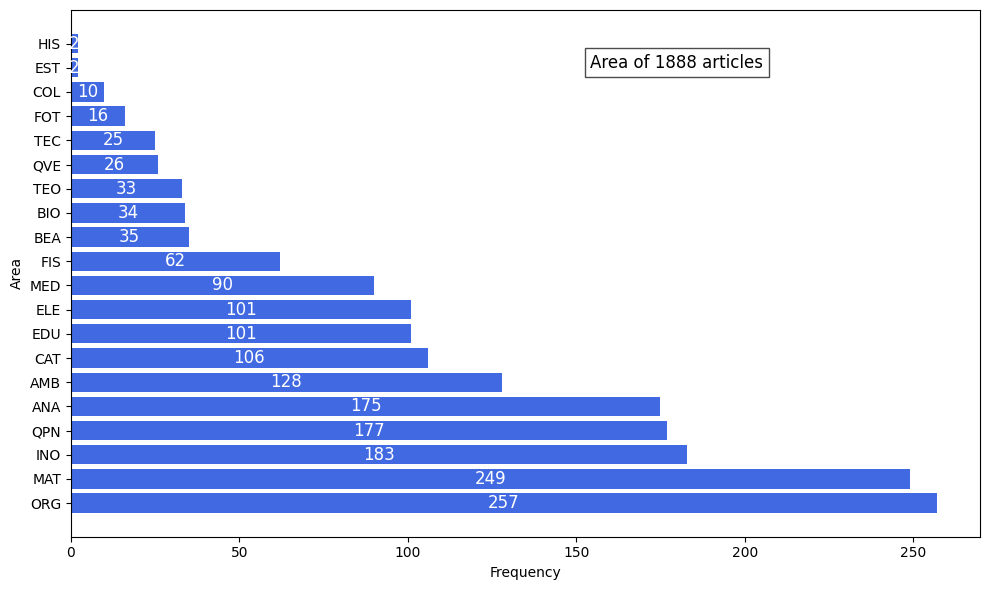

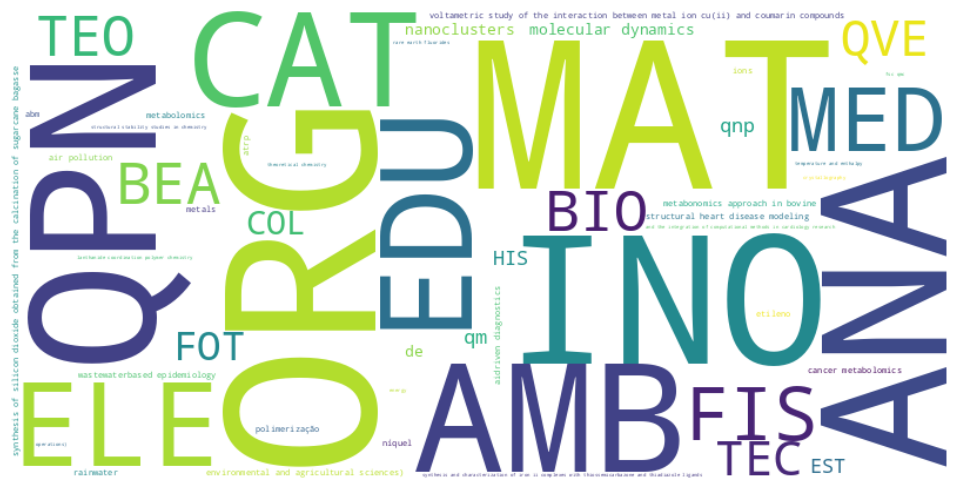

In [37]:
Area_mapping = {
    'AMB': ['Química Ambiental', 'Environmental Chemistry', '(AMB)'],
    'ANA': ['Química Analítica', 'Analytical Chemistry', '(ANA)'],
    'BEA': ['Química de Alimentos e Bebidas', 'Food and Beverage Chemistry', '(BEA)'],
    'BIO': ['Química Biológica', 'Biological Chemistry', 'Biochemistry', '(BIO)'],
    'CAT': ['Catálise', 'Catalysis', 'Catalytic Chemistry', '(CAT)'],
    'COL': ['Química de Superfícies e Colóides', 'Surface and Colloid Chemistry', 'Surface Chemistry', 'Colloid Chemistry', '(COL)'],
    'EDU': ['Ensino de Química', 'Chemistry Teaching', 'Chemical Education','Education', '(EDU)'],
    'ELE': ['Eletroquímica e Eletroanalítica', 'Electrochemistry and Electroanalytics', 'Electrochemical Analysis', '(ELE)'],
    'EST': ['Química Estrutural', 'Structural Chemistry', '(EST)'],
    'FIS': ['Físico-Química', 'Physical Chemistry', '(FIS)','fq'],
    'FOT': ['Fotoquímica', 'Photochemistry', '(FOT)'],
    'HIS': ['História da Química', 'History of Chemistry', '(HIS)'],
    'INO': ['Química Inorgânica', 'Inorganic Chemistry', '(INO)'],
    'MAT': ['Química de Materiais', 'Materials Chemistry', '(MAT)'],
    'MED': ['Química Medicinal', 'Medicinal Chemistry', '(MED)'],
    'ORG': ['Química Orgânica', 'Organic Chemistry', '(ORG)'],
    'QPN': ['Química de Produtos Naturais', 'Natural Products Chemistry', 'Natural Compounds Chemistry', '(QPN)'],
    'QVE': ['Química Verde', 'Green Chemistry', 'Sustainable Chemistry', '(QVE)'],
    'TEC': ['Química Tecnológica', 'Technological Chemistry', 'Applied Chemistry', '(TEC)'],
    'TEO': ['Química Teórica', 'Theoretical Chemistry', 'Computational Chemistry', '(TEO)'],
}

Areas = data['Area'].dropna()

all_Areas = (
    Areas
    .str.split(r'\s*(?:;|,)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    }, regex=True)
)

all_Areas = all_Areas[all_Areas != ""].dropna()

mapped_Areas = all_Areas.apply(lambda x: reverse_map_Area(x, Area_mapping))

Area_counts_geral = Counter(mapped_Areas)
top_Areas = Area_counts_geral.most_common(20)

Areas, counts = zip(*top_Areas)
total_top20 = sum(counts)


plot_Area_bar(top_Areas, context_label="Area of 1888 articles")
plot_Area_wordcloud(Area_counts_geral)

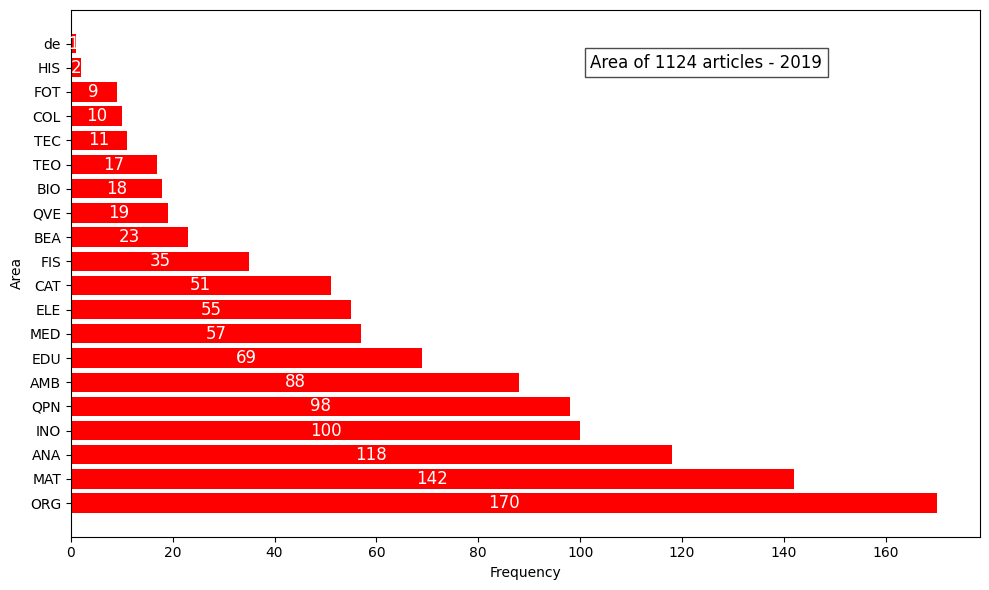

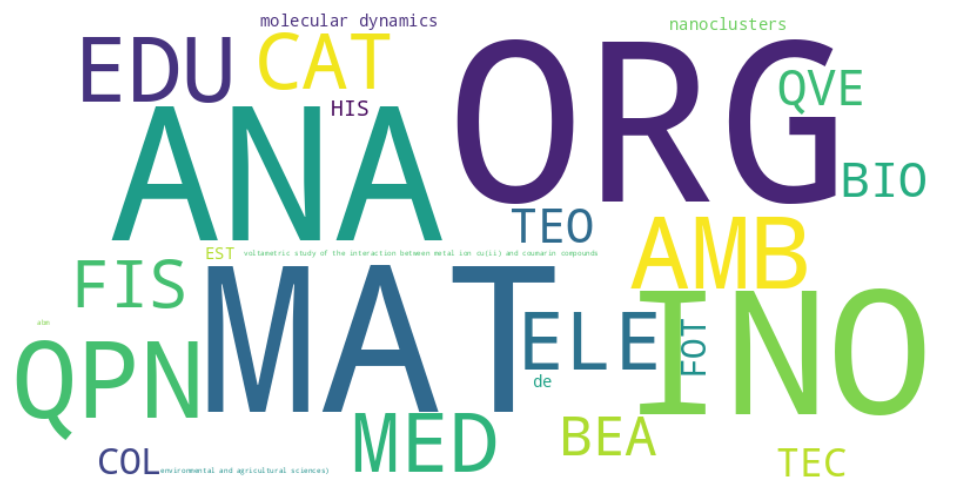

In [5]:
data_2019 = data[data['Year'] == 2019]

Areas = data_2019['Area'].dropna()

all_Areas = (
    Areas
    .str.split(r'\s*(?:;|,)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    }, regex=True)
)
all_Areas = all_Areas[all_Areas != ""].dropna()
mapped_Areas = all_Areas.apply(lambda x: reverse_map_Area(x, Area_mapping))
Area_counts_2019 = Counter(mapped_Areas)
top_Areas = Area_counts_2019.most_common(20)
Areas, counts = zip(*top_Areas)

plot_Area_bar(top_Areas, context_label="Area of 1124 articles - 2019", bar_color="red")
plot_Area_wordcloud(Area_counts_2019)


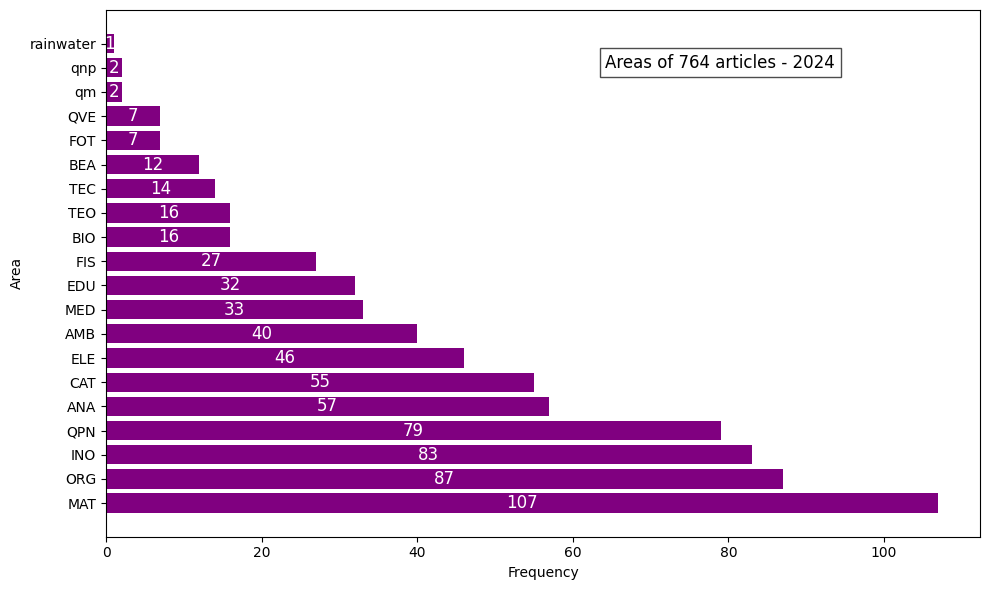

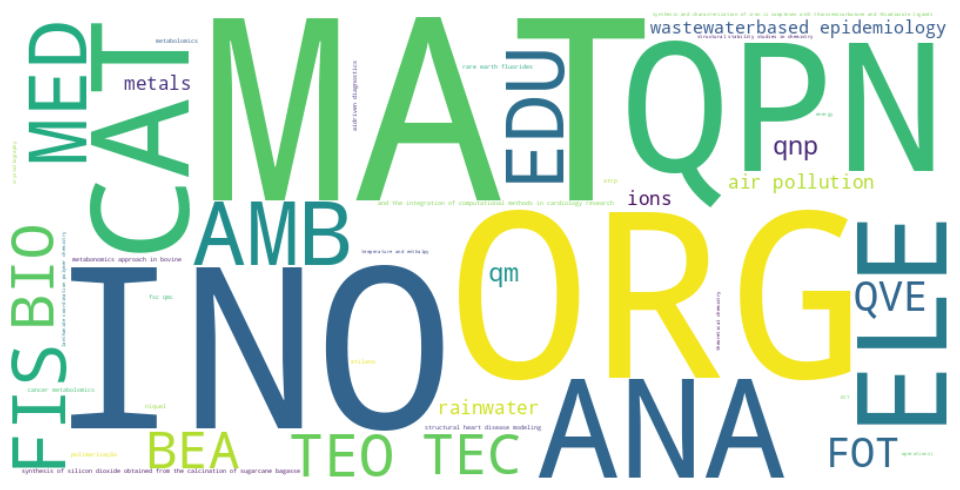

In [ ]:
data_2024 = data[data['Year'] == 2024]
Areas = data_2024['Area'].dropna()

all_Areas = (
    Areas
    .str.split(r'\s*(?:;|,)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    }, regex=True)
)
all_Areas = all_Areas[all_Areas != ""].dropna()
mapped_Areas = all_Areas.apply(lambda x: reverse_map_Area(x, Area_mapping))
Area_counts_2024 = Counter(mapped_Areas)
top_Areas = Area_counts_2024.most_common(20)
Areas, counts = zip(*top_Areas)

plot_Area_bar(top_Areas, context_label="Areas of 764 articles - 2024", bar_color="purple")
plot_Area_wordcloud(Area_counts_2024)

Counter({'ORG': 170, 'MAT': 142, 'ANA': 118, 'INO': 100, 'QPN': 98, 'AMB': 88, 'EDU': 69, 'MED': 57, 'ELE': 55, 'CAT': 51, 'FIS': 35, 'BEA': 23, 'QVE': 19, 'BIO': 18, 'TEO': 17, 'TEC': 11, 'COL': 10, 'FOT': 9, 'HIS': 2, 'de': 1, 'EST': 1, 'nanoclusters': 1, 'molecular dynamics': 1, 'voltametric study of the interaction between metal ion cu(ii) and coumarin compounds': 1, 'abm': 1, 'environmental and agricultural sciences)': 1})
Counter({'MAT': 107, 'ORG': 87, 'INO': 83, 'QPN': 79, 'ANA': 57, 'CAT': 55, 'ELE': 46, 'AMB': 40, 'MED': 33, 'EDU': 32, 'FIS': 27, 'BIO': 16, 'TEO': 16, 'TEC': 14, 'BEA': 12, 'FOT': 7, 'QVE': 7, 'qm': 2, 'qnp': 2, 'rainwater': 1, 'ions': 1, 'metals': 1, 'air pollution': 1, 'wastewaterbased epidemiology': 1, 'synthesis of silicon dioxide obtained from the calcination of sugarcane bagasse': 1, 'metabolomics': 1, 'metabonomics approach in bovine': 1, 'cancer metabolomics': 1, 'níquel': 1, 'polimerização': 1, 'etileno': 1, 'atrp': 1, 'structural heart disease modeli

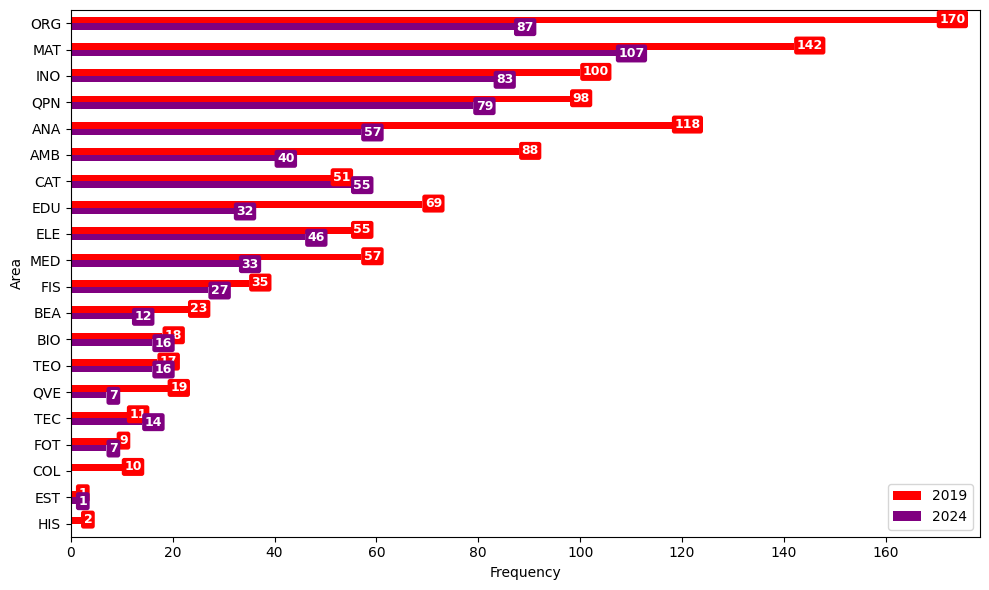

CSV file 'research_area_comparison.csv' created successfully!
Total abstracts in 2019: 1099
Total abstracts in 2024: 749


In [12]:
print(Area_counts_2019)
print(Area_counts_2024)
plot_comparison_bar(
    counts_a=Area_counts_2019,
    counts_b=Area_counts_2024,
    label_a="2019",
    label_b="2024",
)
import csv

# Calculate totals
total_2019 = sum(Area_counts_2019.values())
total_2024 = sum(Area_counts_2024.values())

# Get all unique area codes for consistent ordering
all_areas = sorted(list(set(Area_counts_2019.keys()) | set(Area_counts_2024.keys())))

# Prepare data for CSV
csv_rows = []
csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

for area in all_areas:
    count_2019 = Area_counts_2019.get(area, 0)
    count_2024 = Area_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}", # Format to two decimal places
        count_2024,
        f"{percentage_2024:.2f}", # Format to two decimal places
        f"{percentage_change:.2f}" # Format to two decimal places
    ])

# Define the output CSV file name
output_filename = 'research_area_comparison.csv'

# Write to CSV
with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")
